<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/HOG_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Extraction: Histogram of Oriented Gradients (HOG)**


Pros: 
1.   Maintains good invariance to image geometry and optical deformation
2.   Performs well in feature extraction of rigid objects

Cons:
1.   The feature dimension is large 
2.   The amount of calculation is large
3.   Cannot handle occlusion

Common Uses: Contour information capture; pedestrian detection



Reference: https://learnopencv.com/histogram-of-oriented-gradients/

In [64]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

import matplotlib.pyplot as plt

from google.colab import drive

In [65]:
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/Estimating+carbon+from+an+NDVI+map.jpg' 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(2160, 2153, 3)
<class 'tuple'>


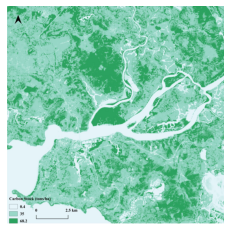

In [66]:
img = imread(PATH)
plt.axis("off")
plt.imshow(img)

print(img.shape)
print(type(img.shape))

## Resizing Image

(640, 640, 3)


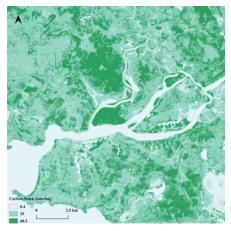

In [67]:
resized_img = resize(img, (640, 640))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

## Create and Visualise HOG Features

In [68]:
cell_size = 16 #@param{type:'slider', min:1, max:64, step:1}

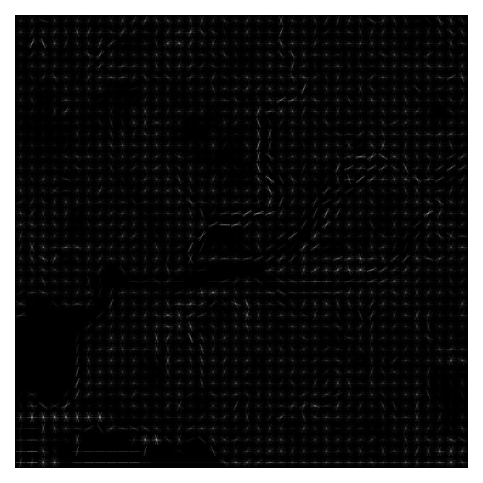

In [69]:
plt.figure(figsize=(4, 4), dpi=150)
fd, hog_img = hog(resized_img, orientations=9, pixels_per_cell=(cell_size, cell_size),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_img, cmap="gray")
plt.show()

In [70]:
import pandas as pd
df = pd.DataFrame(hog_img) 
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.004180,0.000000,0.008778,0.000000,0.000000,0.014267,0.000000,0.007298,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.014563,0.000000,0.016783,0.000000,0.000000,0.019551,0.000000,0.008347,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.003110,0.000000,0.003061,0.000000,...,0.000000,0.015994,0.000000,0.003158,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.022474,0.000000,0.030907,0.000000,0.000000,0.029840,0.000000,0.008246,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.018517,0.000000,0.010921,0.000000,0.000000,0.007169,0.000000,0.001833,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.000000,0.004180,0.008778,0.000000,0.000000,0.014267,0.007298,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.014563,0.016783,0.000000,0.000000,0.019551,0.008347,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003110,0.003061,0.000000,...,0.000000,0.015994,0.003158,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.022474,0.030907,0.000000,0.000000,0.029840,0.008246,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.018517,0.010921,0.000000,0.000000,0.007169,0.001833,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.004761,0.000000,0.000000,0.004180,0.008778,0.000000,0.000000,0.014267,0.007298,0.000000,0.000000,0.007083,0.0,0.0,0.0,0.0,0.008656,0.000000,0.000000,0.014563,0.016783,0.000000,0.000000,0.019551,0.008347,0.000000,0.000000,0.009819,0.0,0.0,0.0,0.0,0.010249,0.000000,0.000000,0.003110,0.003061,0.000000,...,0.000000,0.015994,0.003158,0.000000,0.000000,0.004272,0.0,0.0,0.0,0.0,0.025194,0.000000,0.000000,0.022474,0.030907,0.000000,0.000000,0.029840,0.008246,0.000000,0.000000,0.004364,0.0,0.0,0.0,0.0,0.021217,0.000000,0.000000,0.018517,0.010921,0.000000,0.000000,0.007169,0.001833,0.000000,0.000000,0.001576,0.0,0.0
4,0.0,0.0,0.000000,0.004761,0.000000,0.000000,0.004180,0.008778,0.014267,0.007298,0.000000,0.000000,0.007083,0.000000,0.0,0.0,0.0,0.0,0.000000,0.008656,0.000000,0.000000,0.014563,0.016783,0.019551,0.008347,0.000000,0.000000,0.009819,0.000000,0.0,0.0,0.0,0.0,0.000000,0.010249,0.000000,0.000000,0.003110,0.003061,...,0.015994,0.003158,0.000000,0.000000,0.004272,0.000000,0.0,0.0,0.0,0.0,0.000000,0.025194,0.000000,0.000000,0.022474,0.030907,0.029840,0.008246,0.000000,0.000000,0.004364,0.000000,0.0,0.0,0.0,0.0,0.000000,0.021217,0.000000,0.000000,0.018517,0.010921,0.007169,0.001833,0.000000,0.000000,0.001576,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.000000,0.002373,0.000000,0.000000,0.003285,0.052856,0.022548,0.003455,0.000000,0.000000,0.000503,0.000000,0.0,0.0,0.0,0.0,0.000000,0.003124,0.000000,0.000000,0.003077,0.041145,0.019805,0.000188,0.000000,0.000000,0.003043,0.000000,0.0,0.0,0.0,0.0,0.00000

In [71]:
threshold = 0.0305 #@param{type:'slider', min:0, max:1, step:0.0001}

In [72]:
df2 = (df > threshold).astype(int)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
638,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
df3 = df2.to_numpy()
df3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

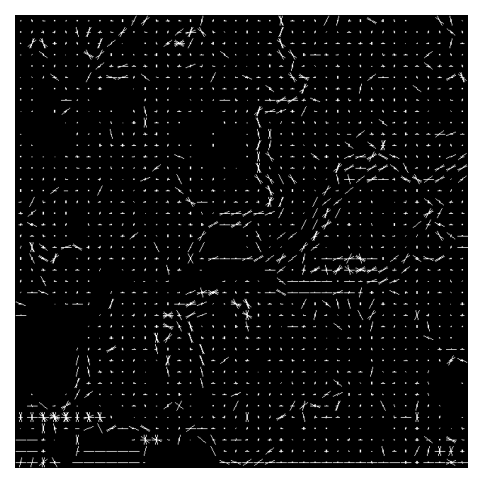

In [74]:
plt.figure(figsize=(4, 4), dpi=150)
plt.axis("off")
plt.imshow(df3, cmap="gray")
plt.show()

In [78]:
import numpy as np
map_data = np.asarray(resized_img)
map_data

array([[[0.65261336, 0.83564645, 0.76251225],
        [0.49563706, 0.79076287, 0.65905312],
        [0.42926432, 0.73939951, 0.59235122],
        ...,
        [0.57241115, 0.80966605, 0.74545037],
        [0.58455882, 0.82107843, 0.75900429],
        [0.57292796, 0.81004902, 0.74901961]],

       [[0.54922143, 0.79433498, 0.69722407],
        [0.34781863, 0.74432292, 0.56522059],
        [0.28541667, 0.68209348, 0.48492647],
        ...,
        [0.542019  , 0.81775429, 0.74545037],
        [0.55421013, 0.83308824, 0.75864277],
        [0.55131415, 0.82885436, 0.75655044]],

       [[0.43422354, 0.76507564, 0.59955921],
        [0.26267042, 0.69435241, 0.45685241],
        [0.2270728 , 0.65203738, 0.42206361],
        ...,
        [0.56113664, 0.81946998, 0.75269608],
        [0.56887255, 0.82720588, 0.75686275],
        [0.56519608, 0.82328431, 0.75318627]],

       ...,

       [[0.92780503, 0.95568015, 0.95915614],
        [0.90853152, 0.94901961, 0.95851409],
        [0.90261087, 0